In [1]:
# importing libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import kmeans, vq
import random
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [6]:

## Import the data
socialism = pd.read_csv("/Users/mishudhar/Desktop/DSSC/socialism_data.csv")

# Check the info of the data
print(socialism.info())
print(socialism.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               44 non-null     object 
 1   exp_environment       44 non-null     float64
 2   exp_total             44 non-null     float64
 3   exp_consumption       44 non-null     float64
 4   exp_housing           44 non-null     float64
 5   exp_health            44 non-null     float64
 6   exp_recreation        44 non-null     float64
 7   exp_education         44 non-null     float64
 8   socialSupport_health  44 non-null     float64
 9   revenues              44 non-null     float64
 10  state_tax_total       44 non-null     float64
 11  social_protection     44 non-null     float64
 12  population            44 non-null     float64
dtypes: float64(12), object(1)
memory usage: 4.6+ KB
None
          country  exp_environment  exp_total  exp_consumption  exp_housin

Based on the articles that I studied, it is really hard to align those essays with the variables available in this data. However, I can consider attributes such as high investment in education, social support, housing support, expenditures in the health sector to provide insurance, social protection, state tax, etc., as the main attributes of a socialist country. I also considered my experience of living in Sweden (a welfare state) and recognize countries like Sweden, France, Denmark, etc., as socialist countries. Based on these attributes, let's try to figure out what are the best socialist countries in the world.


In [7]:
# column names
socialism.columns

Index(['country', 'exp_environment', 'exp_total', 'exp_consumption',
       'exp_housing', 'exp_health', 'exp_recreation', 'exp_education',
       'socialSupport_health', 'revenues', 'state_tax_total',
       'social_protection', 'population'],
      dtype='object')

In [9]:
# scaling the variables
#socialism['scaled_exp_environment'] = whiten(socialism['exp_environment']) # no need for now this was a variable where most of the values were missing
#socialism['scaled_exp_total'] = whiten(socialism['exp_total'])
socialism['scaled_exp_consumption'] = whiten(socialism['exp_consumption'])
socialism['scaled_housing'] = whiten(socialism['exp_housing'])
socialism['scaled_health'] = whiten(socialism['exp_health'])
#socialism['scaled_recreation'] = whiten(socialism['exp_recreation'])
socialism['scaled_education'] = whiten(socialism['exp_education'])
socialism['scaled_socialSupport_health'] = whiten(socialism['socialSupport_health'])
socialism['scaled_revenues'] = whiten(socialism['revenues'])
#socialism['scaled_state_tax_total'] = whiten(socialism['state_tax_total'])
socialism['scaled_social_protection'] = whiten(socialism['social_protection'])
socialism['scaled_population'] = whiten(socialism['population']) 

In [10]:
# Creating a list of scaled features
scaled_features = ['scaled_exp_consumption', 'scaled_housing', 'scaled_health', 
                   'scaled_education', 'scaled_socialSupport_health', 'scaled_revenues', 
                   'scaled_social_protection', 'scaled_population']


In [11]:
# Create centroids with kmeans for 3 clusters
cluster_centers,_ = kmeans(socialism[scaled_features], 3)

# Assign cluster labels and print cluster centers
socialism['cluster_labels'], _ = vq(socialism[scaled_features], cluster_centers)
print(socialism.groupby('cluster_labels')[scaled_features].mean())

                scaled_exp_consumption  scaled_housing  scaled_health  \
cluster_labels                                                          
0                             6.986835        2.301579       4.988534   
1                             5.555066        1.404087       3.192066   
2                             5.197293        2.858856       4.436056   

                scaled_education  scaled_socialSupport_health  \
cluster_labels                                                  
0                       6.006378                     3.747626   
1                       5.518089                     2.636485   
2                       4.852937                     3.623261   

                scaled_revenues  scaled_social_protection  scaled_population  
cluster_labels                                                                
0                      6.655719                  4.253270           0.072021  
1                      5.377253                  3.256365           0.4

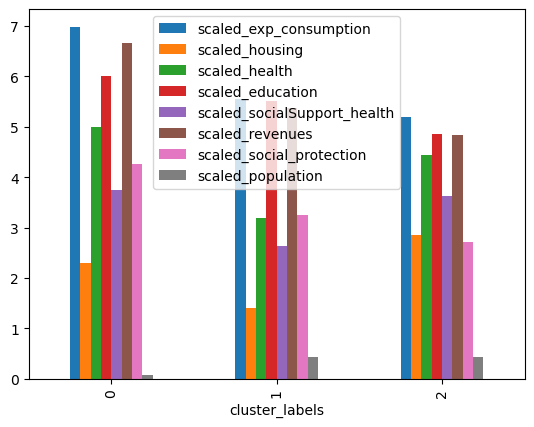

In [12]:
# Plot cluster centers to visualize clusters
socialism.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind= 'bar')
plt.show()

In [14]:
# Get the name column of first 5 countries in each cluster
for cluster in socialism['cluster_labels'].unique():
    print(cluster, socialism[socialism['cluster_labels'] == cluster]['country'].values[:7])

2 ['United States' 'Canada' 'Mexico' 'Chile' 'United Kingdom' 'Ireland'
 'Spain']
0 ['Netherlands' 'Belgium' 'France' 'Austria' 'Finland' 'Sweden' 'Norway']
1 ['Luxembourg' 'Switzerland' 'Portugal' 'Greece' 'Cyprus' 'Bulgaria'
 'Romania']


<Figure size 1400x800 with 0 Axes>

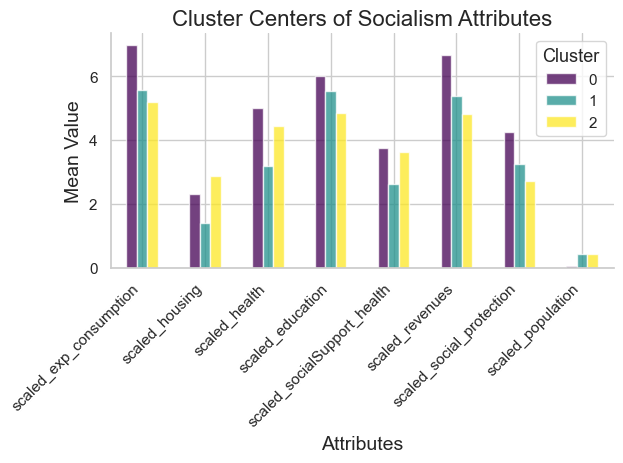

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Compute the mean values of scaled features for each cluster
cluster_means = socialism.groupby('cluster_labels')[scaled_features].mean()

# Create a new figure
plt.figure(figsize=(14, 8))

# Create a bar plot with seaborn
cluster_means.T.plot(kind='bar', legend=True, colormap='viridis', alpha=0.75)

# Customize the plot
plt.title('Cluster Centers of Socialism Attributes', fontsize=16)
plt.xlabel('Attributes', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', title_fontsize='13', fontsize='11')

# Remove top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


Based on the finding above Welfare states such as France, Finland, Sweden, etc are the top socialists countries with the highest value of these attributes and belong to the cluster group 0, USA, UK, Chile, etc are the less socialists state.

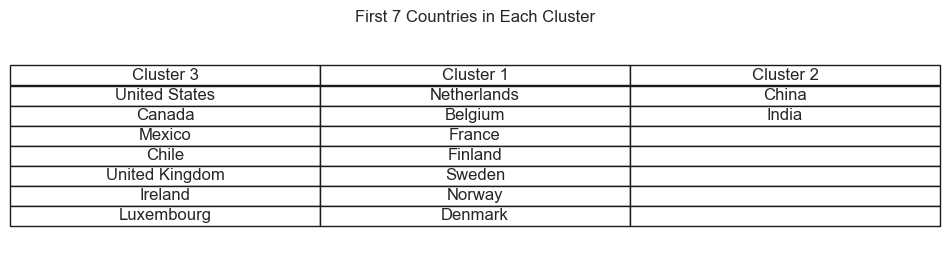

In [21]:
# Initialize an empty dictionary to hold cluster data
cluster_dict = {}

# Extract the first 7 countries for each cluster
for cluster in socialism['cluster_labels'].unique():
    cluster_dict[f'Cluster {cluster}'] = socialism[socialism['cluster_labels'] == cluster]['country'].values[:7]

# Convert the dictionary to a DataFrame
cluster_df = pd.DataFrame.from_dict(cluster_dict, orient='index').transpose()

# Plot the DataFrame as a table
plt.figure(figsize=(10, 3))
plt.axis('off')
tbl = plt.table(cellText=cluster_df.values,
                colLabels=cluster_df.columns,
                cellLoc='center',
                loc='center')

# Set table style
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)

# Display the table
plt.title('First 7 Countries in Each Cluster')
plt.show()










# Hierchical Clusterng

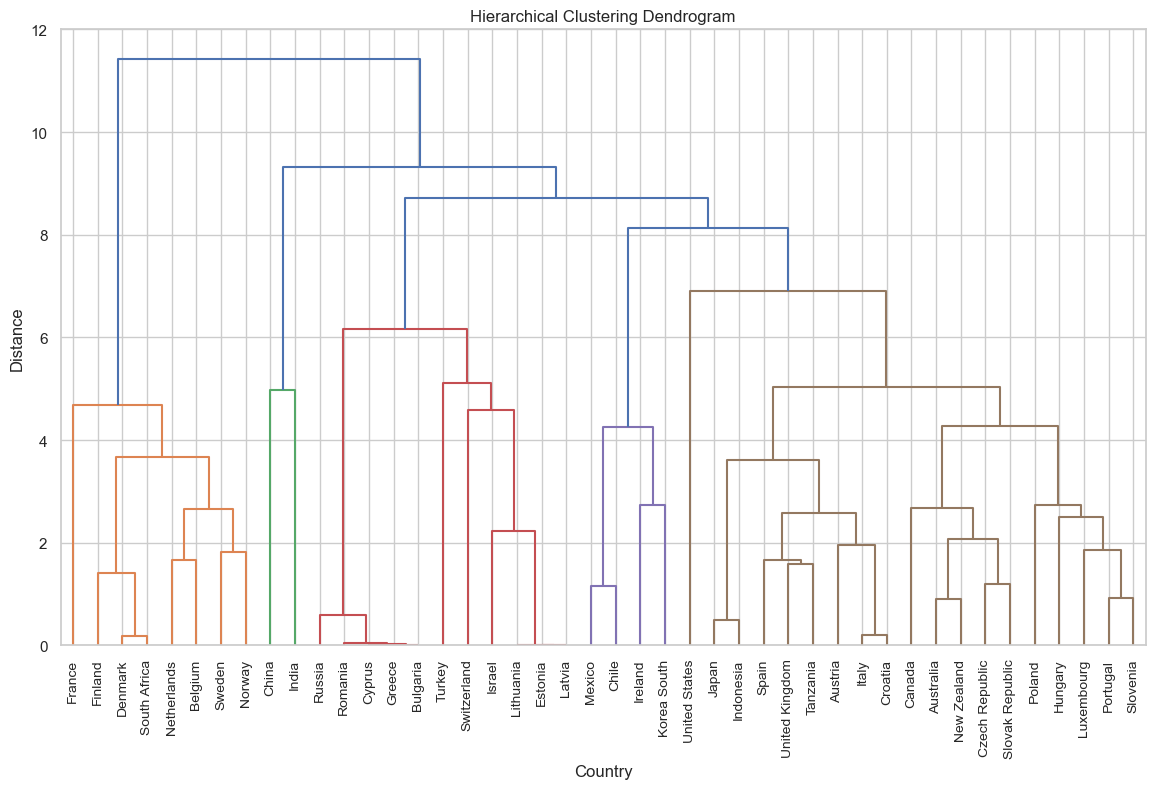

In [16]:
# Perform hierarchical clustering
Z = linkage(socialism[scaled_features], method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendrogram(Z, labels=socialism['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()


In [19]:
# Decide the number of clusters
num_clusters = 3  

# Assign cluster labels
socialism['cluster_labels'] = fcluster(Z, num_clusters, criterion='maxclust')


<Figure size 1400x800 with 0 Axes>

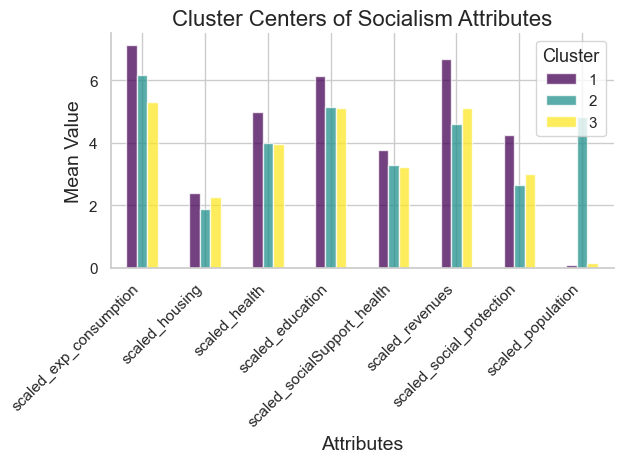

Cluster 3:
['United States' 'Canada' 'Mexico' 'Chile' 'United Kingdom']


Cluster 1:
['Netherlands' 'Belgium' 'France' 'Finland' 'Sweden']


Cluster 2:
['China' 'India']




In [20]:
# Compute the mean values of scaled features for each cluster
cluster_means = socialism.groupby('cluster_labels')[scaled_features].mean()

# Create a new figure
plt.figure(figsize=(14, 8))

# Create a bar plot with seaborn
cluster_means.T.plot(kind='bar', legend=True, colormap='viridis', alpha=0.75)

# Customize the plot
plt.title('Cluster Centers of Socialism Attributes', fontsize=16)
plt.xlabel('Attributes', fontsize=14)
plt.ylabel('Mean Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', title_fontsize='13', fontsize='11')

# Remove top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

# Print the name column of first 5 countries in each cluster
for cluster in socialism['cluster_labels'].unique():
    print(f"Cluster {cluster}:")
    print(socialism[socialism['cluster_labels'] == cluster]['country'].values[:5])
    print("\n")
